In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [4]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
def load_data(file):
    df = pd.read_csv(file)
    df.drop(columns="Unnamed: 0", inplace= True)
    df = df.set_index("Date")
    return df

In [10]:
locA = load_data("data/LocationA.csv")
locB = load_data("data/LocationB.csv")
locC = load_data("data/LocationC.csv")
locD = load_data("data/LocationD.csv")

In [11]:
locA.head()

,TempA,pHA,ECA,DOA,BODA,TNA
Date,,,,,,
12/15/2021,21.50,7.73,1748,2.55,27.96,1.28
12/16/2021,21.21,7.82,1765,2.60,27.90,1.08
12/17/2021,21.21,7.73,1769,2.59,27.88,1.17
12/18/2021,21.26,7.82,1776,2.63,27.66,1.15
12/19/2021,21.09,7.76,1822,2.60,27.71,1.22


<AxesSubplot:xlabel='Date'>

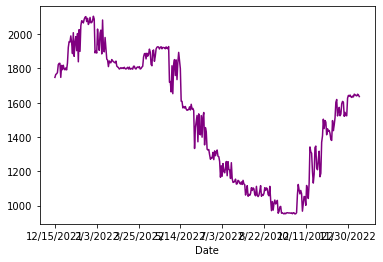

In [20]:
locA["ECA"].plot(color = "purple")

<AxesSubplot:xlabel='Date'>

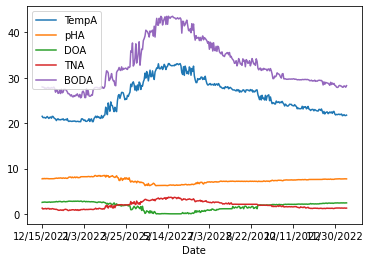

In [21]:
locA[["TempA", "pHA", "DOA", "TNA", "BODA"]].plot()

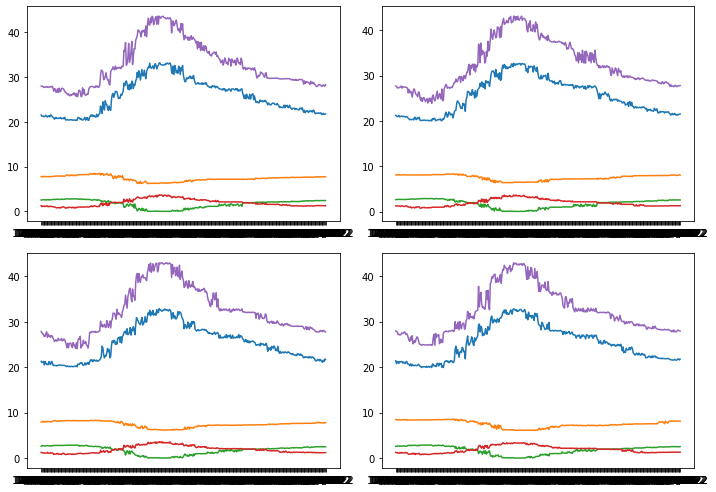

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

#create subplots
ax[0, 0].plot(locA[["TempA", "pHA", "DOA", "TNA", "BODA"]])
ax[0, 1].plot(locB[["TempB", "pHB", "DOB", "TNB", "BODB"]])
ax[1, 0].plot(locC[["TempC", "pHC", "DOC", "TNC", "BODC"]])
ax[1, 1].plot(locD[["TempD", "pHD", "DOD", "TND", "BODD"]])

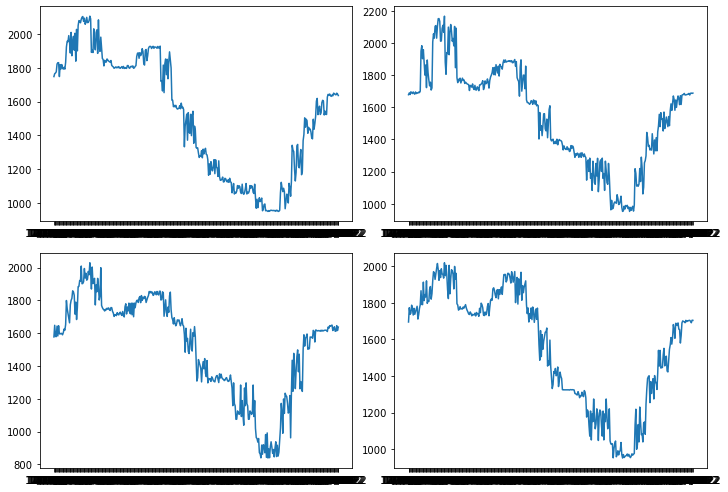

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10,7))
fig.tight_layout()

#create subplots
ax[0, 0].plot(locA["ECA"])
ax[0, 1].plot(locB["ECB"])
ax[1, 0].plot(locC["ECC"])
ax[1, 1].plot(locD["ECD"])

In [39]:
doA = locA["DOA"]
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(doA, WINDOW_SIZE)
X1.shape, y1.shape

((362, 3, 1), (362,))

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

## LSTM

In [43]:
model1 = Sequential()
model1.add(InputLayer((3, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [46]:
cp1 = ModelCheckpoint('lstmmodel1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [47]:
model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
1/8 [==>...........................] - ETA: 15s - loss: 3.3545 - root_mean_squared_error: 1.8315

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 5s 453ms/step - loss: 3.4844 - root_mean_squared_error: 1.8667 - val_loss: 3.0432 - val_root_mean_squared_error: 1.7445
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 3.6367 - root_mean_squared_error: 1.9070

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 374ms/step - loss: 3.4148 - root_mean_squared_error: 1.8479 - val_loss: 2.9839 - val_root_mean_squared_error: 1.7274
Epoch 3/100
1/8 [==>...........................] - ETA: 0s - loss: 3.2196 - root_mean_squared_error: 1.7943

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 395ms/step - loss: 3.3484 - root_mean_squared_error: 1.8299 - val_loss: 2.9254 - val_root_mean_squared_error: 1.7104
Epoch 4/100
1/8 [==>...........................] - ETA: 0s - loss: 3.7052 - root_mean_squared_error: 1.9249

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 416ms/step - loss: 3.2830 - root_mean_squared_error: 1.8119 - val_loss: 2.8664 - val_root_mean_squared_error: 1.6931
Epoch 5/100
1/8 [==>...........................] - ETA: 0s - loss: 3.6653 - root_mean_squared_error: 1.9145

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 396ms/step - loss: 3.2158 - root_mean_squared_error: 1.7933 - val_loss: 2.8073 - val_root_mean_squared_error: 1.6755
Epoch 6/100
1/8 [==>...........................] - ETA: 0s - loss: 3.5011 - root_mean_squared_error: 1.8711

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 403ms/step - loss: 3.1487 - root_mean_squared_error: 1.7745 - val_loss: 2.7475 - val_root_mean_squared_error: 1.6576
Epoch 7/100
1/8 [==>...........................] - ETA: 0s - loss: 3.3781 - root_mean_squared_error: 1.8380

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 402ms/step - loss: 3.0813 - root_mean_squared_error: 1.7554 - val_loss: 2.6868 - val_root_mean_squared_error: 1.6392
Epoch 8/100
1/8 [==>...........................] - ETA: 0s - loss: 3.1043 - root_mean_squared_error: 1.7619

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 421ms/step - loss: 3.0119 - root_mean_squared_error: 1.7355 - val_loss: 2.6276 - val_root_mean_squared_error: 1.6210
Epoch 9/100
1/8 [==>...........................] - ETA: 0s - loss: 2.7720 - root_mean_squared_error: 1.6649

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 579ms/step - loss: 2.9460 - root_mean_squared_error: 1.7164 - val_loss: 2.5689 - val_root_mean_squared_error: 1.6028
Epoch 10/100
1/8 [==>...........................] - ETA: 0s - loss: 3.1321 - root_mean_squared_error: 1.7698

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 405ms/step - loss: 2.8797 - root_mean_squared_error: 1.6970 - val_loss: 2.5079 - val_root_mean_squared_error: 1.5836
Epoch 11/100
1/8 [==>...........................] - ETA: 0s - loss: 3.2618 - root_mean_squared_error: 1.8060

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 2.8101 - root_mean_squared_error: 1.6763 - val_loss: 2.4470 - val_root_mean_squared_error: 1.5643
Epoch 12/100
1/8 [==>...........................] - ETA: 0s - loss: 2.6358 - root_mean_squared_error: 1.6235

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 370ms/step - loss: 2.7401 - root_mean_squared_error: 1.6553 - val_loss: 2.3845 - val_root_mean_squared_error: 1.5442
Epoch 13/100
1/8 [==>...........................] - ETA: 0s - loss: 2.9575 - root_mean_squared_error: 1.7197

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 2.6703 - root_mean_squared_error: 1.6341 - val_loss: 2.3201 - val_root_mean_squared_error: 1.5232
Epoch 14/100
1/8 [==>...........................] - ETA: 0s - loss: 3.1009 - root_mean_squared_error: 1.7609

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 369ms/step - loss: 2.5983 - root_mean_squared_error: 1.6119 - val_loss: 2.2553 - val_root_mean_squared_error: 1.5018
Epoch 15/100
1/8 [==>...........................] - ETA: 0s - loss: 2.6024 - root_mean_squared_error: 1.6132

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 362ms/step - loss: 2.5235 - root_mean_squared_error: 1.5886 - val_loss: 2.1909 - val_root_mean_squared_error: 1.4802
Epoch 16/100
1/8 [==>...........................] - ETA: 0s - loss: 2.0771 - root_mean_squared_error: 1.4412

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 2.4493 - root_mean_squared_error: 1.5650 - val_loss: 2.1251 - val_root_mean_squared_error: 1.4578
Epoch 17/100
1/8 [==>...........................] - ETA: 0s - loss: 2.6009 - root_mean_squared_error: 1.6127

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 374ms/step - loss: 2.3763 - root_mean_squared_error: 1.5415 - val_loss: 2.0584 - val_root_mean_squared_error: 1.4347
Epoch 18/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3770 - root_mean_squared_error: 1.5418

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 585ms/step - loss: 2.3004 - root_mean_squared_error: 1.5167 - val_loss: 1.9931 - val_root_mean_squared_error: 1.4118
Epoch 19/100
1/8 [==>...........................] - ETA: 0s - loss: 2.0993 - root_mean_squared_error: 1.4489

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 366ms/step - loss: 2.2247 - root_mean_squared_error: 1.4915 - val_loss: 1.9251 - val_root_mean_squared_error: 1.3875
Epoch 20/100
1/8 [==>...........................] - ETA: 0s - loss: 2.3834 - root_mean_squared_error: 1.5438

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 389ms/step - loss: 2.1486 - root_mean_squared_error: 1.4658 - val_loss: 1.8553 - val_root_mean_squared_error: 1.3621
Epoch 21/100
1/8 [==>...........................] - ETA: 0s - loss: 1.6761 - root_mean_squared_error: 1.2946

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 379ms/step - loss: 2.0695 - root_mean_squared_error: 1.4386 - val_loss: 1.7851 - val_root_mean_squared_error: 1.3361
Epoch 22/100
1/8 [==>...........................] - ETA: 0s - loss: 1.8404 - root_mean_squared_error: 1.3566

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 1.9890 - root_mean_squared_error: 1.4103 - val_loss: 1.7165 - val_root_mean_squared_error: 1.3101
Epoch 23/100
1/8 [==>...........................] - ETA: 0s - loss: 1.8346 - root_mean_squared_error: 1.3545

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 364ms/step - loss: 1.9110 - root_mean_squared_error: 1.3824 - val_loss: 1.6450 - val_root_mean_squared_error: 1.2826
Epoch 24/100
1/8 [==>...........................] - ETA: 0s - loss: 2.0046 - root_mean_squared_error: 1.4158

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 1.8308 - root_mean_squared_error: 1.3531 - val_loss: 1.5724 - val_root_mean_squared_error: 1.2539
Epoch 25/100
1/8 [==>...........................] - ETA: 0s - loss: 2.1142 - root_mean_squared_error: 1.4540

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 369ms/step - loss: 1.7491 - root_mean_squared_error: 1.3226 - val_loss: 1.4982 - val_root_mean_squared_error: 1.2240
Epoch 26/100
1/8 [==>...........................] - ETA: 0s - loss: 1.8670 - root_mean_squared_error: 1.3664

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 369ms/step - loss: 1.6639 - root_mean_squared_error: 1.2899 - val_loss: 1.4255 - val_root_mean_squared_error: 1.1939
Epoch 27/100
1/8 [==>...........................] - ETA: 0s - loss: 1.3700 - root_mean_squared_error: 1.1705

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 572ms/step - loss: 1.5812 - root_mean_squared_error: 1.2575 - val_loss: 1.3511 - val_root_mean_squared_error: 1.1623
Epoch 28/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4679 - root_mean_squared_error: 1.2116

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 1.4966 - root_mean_squared_error: 1.2234 - val_loss: 1.2770 - val_root_mean_squared_error: 1.1300
Epoch 29/100
1/8 [==>...........................] - ETA: 0s - loss: 1.4623 - root_mean_squared_error: 1.2093

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 362ms/step - loss: 1.4128 - root_mean_squared_error: 1.1886 - val_loss: 1.2008 - val_root_mean_squared_error: 1.0958
Epoch 30/100
1/8 [==>...........................] - ETA: 0s - loss: 1.6317 - root_mean_squared_error: 1.2774

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 1.3284 - root_mean_squared_error: 1.1526 - val_loss: 1.1242 - val_root_mean_squared_error: 1.0603
Epoch 31/100
1/8 [==>...........................] - ETA: 0s - loss: 1.2464 - root_mean_squared_error: 1.1164

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 383ms/step - loss: 1.2406 - root_mean_squared_error: 1.1138 - val_loss: 1.0504 - val_root_mean_squared_error: 1.0249
Epoch 32/100
1/8 [==>...........................] - ETA: 0s - loss: 0.9262 - root_mean_squared_error: 0.9624

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 390ms/step - loss: 1.1584 - root_mean_squared_error: 1.0763 - val_loss: 0.9782 - val_root_mean_squared_error: 0.9890
Epoch 33/100
1/8 [==>...........................] - ETA: 0s - loss: 1.3234 - root_mean_squared_error: 1.1504

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 1.0779 - root_mean_squared_error: 1.0382 - val_loss: 0.9059 - val_root_mean_squared_error: 0.9518
Epoch 34/100
1/8 [==>...........................] - ETA: 0s - loss: 0.7437 - root_mean_squared_error: 0.8624

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.9954 - root_mean_squared_error: 0.9977 - val_loss: 0.8349 - val_root_mean_squared_error: 0.9138
Epoch 35/100
1/8 [==>...........................] - ETA: 0s - loss: 1.2607 - root_mean_squared_error: 1.1228

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 571ms/step - loss: 0.9176 - root_mean_squared_error: 0.9579 - val_loss: 0.7649 - val_root_mean_squared_error: 0.8746
Epoch 36/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8447 - root_mean_squared_error: 0.9191

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 0.8383 - root_mean_squared_error: 0.9156 - val_loss: 0.6971 - val_root_mean_squared_error: 0.8349
Epoch 37/100
1/8 [==>...........................] - ETA: 0s - loss: 0.8489 - root_mean_squared_error: 0.9213

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 408ms/step - loss: 0.7626 - root_mean_squared_error: 0.8733 - val_loss: 0.6316 - val_root_mean_squared_error: 0.7947
Epoch 38/100
1/8 [==>...........................] - ETA: 0s - loss: 0.7256 - root_mean_squared_error: 0.8518

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 398ms/step - loss: 0.6912 - root_mean_squared_error: 0.8314 - val_loss: 0.5695 - val_root_mean_squared_error: 0.7546
Epoch 39/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6561 - root_mean_squared_error: 0.8100

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 420ms/step - loss: 0.6212 - root_mean_squared_error: 0.7882 - val_loss: 0.5094 - val_root_mean_squared_error: 0.7137
Epoch 40/100
1/8 [==>...........................] - ETA: 0s - loss: 0.6204 - root_mean_squared_error: 0.7877

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 372ms/step - loss: 0.5546 - root_mean_squared_error: 0.7447 - val_loss: 0.4534 - val_root_mean_squared_error: 0.6734
Epoch 41/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5102 - root_mean_squared_error: 0.7143

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.4937 - root_mean_squared_error: 0.7026 - val_loss: 0.3999 - val_root_mean_squared_error: 0.6324
Epoch 42/100
1/8 [==>...........................] - ETA: 0s - loss: 0.5709 - root_mean_squared_error: 0.7555

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 411ms/step - loss: 0.4353 - root_mean_squared_error: 0.6597 - val_loss: 0.3504 - val_root_mean_squared_error: 0.5919
Epoch 43/100
1/8 [==>...........................] - ETA: 0s - loss: 0.4937 - root_mean_squared_error: 0.7026

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 380ms/step - loss: 0.3812 - root_mean_squared_error: 0.6174 - val_loss: 0.3046 - val_root_mean_squared_error: 0.5519
Epoch 44/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2887 - root_mean_squared_error: 0.5373

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 591ms/step - loss: 0.3304 - root_mean_squared_error: 0.5748 - val_loss: 0.2636 - val_root_mean_squared_error: 0.5134
Epoch 45/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3017 - root_mean_squared_error: 0.5493

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 366ms/step - loss: 0.2869 - root_mean_squared_error: 0.5357 - val_loss: 0.2267 - val_root_mean_squared_error: 0.4762
Epoch 46/100
1/8 [==>...........................] - ETA: 0s - loss: 0.3236 - root_mean_squared_error: 0.5688

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 376ms/step - loss: 0.2476 - root_mean_squared_error: 0.4976 - val_loss: 0.1929 - val_root_mean_squared_error: 0.4392
Epoch 47/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2510 - root_mean_squared_error: 0.5010

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 0.2116 - root_mean_squared_error: 0.4599 - val_loss: 0.1640 - val_root_mean_squared_error: 0.4049
Epoch 48/100
1/8 [==>...........................] - ETA: 0s - loss: 0.2027 - root_mean_squared_error: 0.4502

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 0.1807 - root_mean_squared_error: 0.4251 - val_loss: 0.1392 - val_root_mean_squared_error: 0.3731
Epoch 49/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1675 - root_mean_squared_error: 0.4093

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 367ms/step - loss: 0.1545 - root_mean_squared_error: 0.3931 - val_loss: 0.1181 - val_root_mean_squared_error: 0.3436
Epoch 50/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1480 - root_mean_squared_error: 0.3847

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 376ms/step - loss: 0.1327 - root_mean_squared_error: 0.3643 - val_loss: 0.1003 - val_root_mean_squared_error: 0.3167
Epoch 51/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1031 - root_mean_squared_error: 0.3212

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 436ms/step - loss: 0.1145 - root_mean_squared_error: 0.3384 - val_loss: 0.0862 - val_root_mean_squared_error: 0.2935
Epoch 52/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0748 - root_mean_squared_error: 0.2734

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 371ms/step - loss: 0.0992 - root_mean_squared_error: 0.3150 - val_loss: 0.0743 - val_root_mean_squared_error: 0.2726
Epoch 53/100
1/8 [==>...........................] - ETA: 0s - loss: 0.1047 - root_mean_squared_error: 0.3236

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 632ms/step - loss: 0.0872 - root_mean_squared_error: 0.2953 - val_loss: 0.0642 - val_root_mean_squared_error: 0.2533
Epoch 54/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0827 - root_mean_squared_error: 0.2875

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 0.0772 - root_mean_squared_error: 0.2778 - val_loss: 0.0564 - val_root_mean_squared_error: 0.2375
Epoch 55/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0657 - root_mean_squared_error: 0.2562

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 371ms/step - loss: 0.0694 - root_mean_squared_error: 0.2634 - val_loss: 0.0502 - val_root_mean_squared_error: 0.2240
Epoch 56/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0682 - root_mean_squared_error: 0.2611

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 366ms/step - loss: 0.0632 - root_mean_squared_error: 0.2514 - val_loss: 0.0452 - val_root_mean_squared_error: 0.2125
Epoch 57/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0706 - root_mean_squared_error: 0.2656

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 370ms/step - loss: 0.0580 - root_mean_squared_error: 0.2409 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2035
Epoch 58/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0789 - root_mean_squared_error: 0.2809

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 366ms/step - loss: 0.0543 - root_mean_squared_error: 0.2330 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1962
Epoch 59/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0503 - root_mean_squared_error: 0.2242

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 0.0514 - root_mean_squared_error: 0.2267 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1903
Epoch 60/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0422 - root_mean_squared_error: 0.2054

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 379ms/step - loss: 0.0493 - root_mean_squared_error: 0.2220 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1857
Epoch 61/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0389 - root_mean_squared_error: 0.1972

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 377ms/step - loss: 0.0475 - root_mean_squared_error: 0.2179 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1822
Epoch 62/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0424 - root_mean_squared_error: 0.2060

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 627ms/step - loss: 0.0463 - root_mean_squared_error: 0.2151 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1794
Epoch 63/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0452 - root_mean_squared_error: 0.2126

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 507ms/step - loss: 0.0454 - root_mean_squared_error: 0.2130 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1775
Epoch 64/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0345 - root_mean_squared_error: 0.1858

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 497ms/step - loss: 0.0447 - root_mean_squared_error: 0.2113 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1761
Epoch 65/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2084

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 445ms/step - loss: 0.0442 - root_mean_squared_error: 0.2102 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1750
Epoch 66/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0440 - root_mean_squared_error: 0.2098

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 369ms/step - loss: 0.0438 - root_mean_squared_error: 0.2094 - val_loss: 0.0303 - val_root_mean_squared_error: 0.1741
Epoch 67/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0634 - root_mean_squared_error: 0.2518

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 0.0435 - root_mean_squared_error: 0.2087 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735
Epoch 68/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0583 - root_mean_squared_error: 0.2414

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.0433 - root_mean_squared_error: 0.2081 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 69/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0381 - root_mean_squared_error: 0.1951

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.0431 - root_mean_squared_error: 0.2077 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1724
Epoch 70/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0365 - root_mean_squared_error: 0.1911

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 364ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1719
Epoch 71/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0479 - root_mean_squared_error: 0.2188

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 575ms/step - loss: 0.0428 - root_mean_squared_error: 0.2068 - val_loss: 0.0294 - val_root_mean_squared_error: 0.1715
Epoch 72/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0612 - root_mean_squared_error: 0.2474

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 362ms/step - loss: 0.0426 - root_mean_squared_error: 0.2065 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1711
Epoch 73/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0496 - root_mean_squared_error: 0.2228

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 410ms/step - loss: 0.0425 - root_mean_squared_error: 0.2062 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1707
Epoch 74/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0548 - root_mean_squared_error: 0.2340

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 0.0424 - root_mean_squared_error: 0.2058 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1704
Epoch 75/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0293 - root_mean_squared_error: 0.1711

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 0.0422 - root_mean_squared_error: 0.2055 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1701
Epoch 76/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0485 - root_mean_squared_error: 0.2203

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 362ms/step - loss: 0.0421 - root_mean_squared_error: 0.2052 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1697
Epoch 77/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0153 - root_mean_squared_error: 0.1237

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.0420 - root_mean_squared_error: 0.2048 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694
Epoch 78/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0509 - root_mean_squared_error: 0.2257

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 371ms/step - loss: 0.0418 - root_mean_squared_error: 0.2046 - val_loss: 0.0286 - val_root_mean_squared_error: 0.1691
Epoch 79/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1548

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 364ms/step - loss: 0.0417 - root_mean_squared_error: 0.2043 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1688
Epoch 80/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1349

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 573ms/step - loss: 0.0416 - root_mean_squared_error: 0.2040 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1685
Epoch 81/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2144

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 386ms/step - loss: 0.0415 - root_mean_squared_error: 0.2037 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 82/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0580 - root_mean_squared_error: 0.2409

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.0414 - root_mean_squared_error: 0.2034 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1679
Epoch 83/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0248 - root_mean_squared_error: 0.1573

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 362ms/step - loss: 0.0412 - root_mean_squared_error: 0.2031 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 84/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1933

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 412ms/step - loss: 0.0411 - root_mean_squared_error: 0.2028 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1674
Epoch 85/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0348 - root_mean_squared_error: 0.1865

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 367ms/step - loss: 0.0410 - root_mean_squared_error: 0.2025 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671
Epoch 86/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0554 - root_mean_squared_error: 0.2353

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 0.0409 - root_mean_squared_error: 0.2022 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1668
Epoch 87/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0280 - root_mean_squared_error: 0.1672

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 0.0408 - root_mean_squared_error: 0.2019 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 88/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0202 - root_mean_squared_error: 0.1421

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 363ms/step - loss: 0.0406 - root_mean_squared_error: 0.2016 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1662
Epoch 89/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0502 - root_mean_squared_error: 0.2241

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 580ms/step - loss: 0.0405 - root_mean_squared_error: 0.2014 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1659
Epoch 90/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0171 - root_mean_squared_error: 0.1309

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 360ms/step - loss: 0.0404 - root_mean_squared_error: 0.2011 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 91/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0543 - root_mean_squared_error: 0.2330

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 361ms/step - loss: 0.0403 - root_mean_squared_error: 0.2007 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1653
Epoch 92/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0304 - root_mean_squared_error: 0.1745

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 371ms/step - loss: 0.0402 - root_mean_squared_error: 0.2005 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1650
Epoch 93/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0660 - root_mean_squared_error: 0.2569

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 368ms/step - loss: 0.0401 - root_mean_squared_error: 0.2002 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1647
Epoch 94/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0459 - root_mean_squared_error: 0.2143

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 0.0400 - root_mean_squared_error: 0.1999 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1645
Epoch 95/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0489 - root_mean_squared_error: 0.2212

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 409ms/step - loss: 0.0399 - root_mean_squared_error: 0.1996 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1642
Epoch 96/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0438 - root_mean_squared_error: 0.2092

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 366ms/step - loss: 0.0397 - root_mean_squared_error: 0.1994 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1639
Epoch 97/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0476 - root_mean_squared_error: 0.2182

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 364ms/step - loss: 0.0396 - root_mean_squared_error: 0.1991 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 98/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0292 - root_mean_squared_error: 0.1710

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 4s 575ms/step - loss: 0.0395 - root_mean_squared_error: 0.1988 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1634
Epoch 99/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0426 - root_mean_squared_error: 0.2064

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 365ms/step - loss: 0.0394 - root_mean_squared_error: 0.1986 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1631
Epoch 100/100
1/8 [==>...........................] - ETA: 0s - loss: 0.0282 - root_mean_squared_error: 0.1680

INFO:tensorflow:Assets written to: lstmmodel1/assets


INFO:tensorflow:Assets written to: lstmmodel1/assets


8/8 [==============================] - 3s 360ms/step - loss: 0.0393 - root_mean_squared_error: 0.1983 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1628


In [48]:
model1 = load_model('lstmmodel1/')

In [49]:
train_predictions = model1.predict(x_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
train_results

8/8 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,0.271080,0.01
1,2.172774,2.17
2,1.833961,0.94
3,1.571019,1.42
4,2.082569,2.09
...,...,...
226,2.397632,2.45
227,2.348625,2.40
228,0.414174,0.07
229,2.066457,2.04


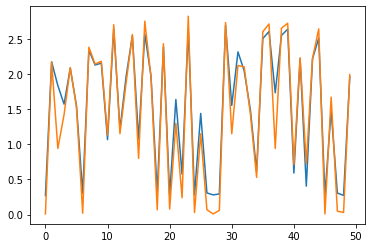

In [50]:
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actuals'][:50])

In [58]:
val_predictions = model1.predict(x_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

2/2 [==============================] - 0s 3ms/step


,Val Predictions,Actuals
0,0.975821,0.81
1,2.544312,2.56
2,0.779452,0.92
3,0.764617,0.78
4,2.338344,2.43
5,2.294114,2.02
6,2.141792,2.11
7,1.021722,0.94
8,1.529475,1.51
9,2.108654,2.00


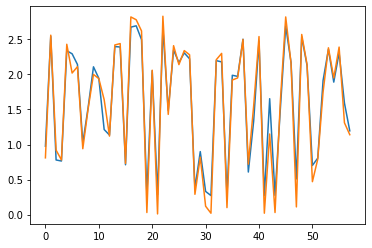

In [59]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [60]:
test_predictions = model1.predict(x_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

3/3 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,1.989285,1.96
1,2.134750,2.18
2,1.883405,1.90
3,0.416818,0.40
4,0.320796,0.05
...,...,...
68,2.225437,2.24
69,2.140084,2.14
70,1.196613,1.15
71,2.165421,2.14


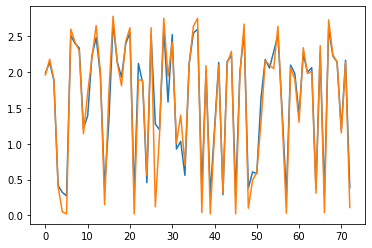

In [61]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [62]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

3/3 [==============================] - 0s 5ms/step


(    Predictions  Actuals
 0      1.989285     1.96
 1      2.134750     2.18
 2      1.883405     1.90
 3      0.416818     0.40
 4      0.320796     0.05
 ..          ...      ...
 68     2.225437     2.24
 69     2.140084     2.14
 70     1.196613     1.15
 71     2.165421     2.14
 72     0.383933     0.11
 
 [73 rows x 2 columns],
 0.04345423852714582)

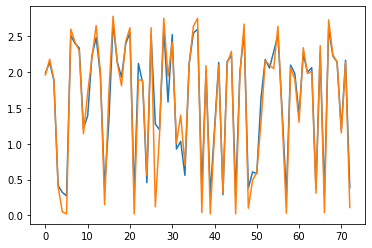

In [63]:
plot_predictions1(model1, x_test, y_test)